Random Forest

In [16]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

Extract data

In [2]:
data = pd.read_json('../data/dataSet_Culture_06102023-POINT.json')

In [3]:
df = pd.DataFrame(data)
df.head()

,polygon,indextype,averagevalue,Analysis Date,year contour,elevation_contour,district_name,soil_id,soil_name,culture_name,type_culture_name
0,"{'x': 76.095454293, 'y': 42.728343002}",NDVI,0.217,2020-06-04,2020,1544,Kemin district,28,Горные светло-каштановые,Картофель,Яровая
1,"{'x': 76.095454293, 'y': 42.728343002}",NDVI,0.215,2020-08-03,2020,1544,Kemin district,28,Горные светло-каштановые,Картофель,Яровая
2,"{'x': 76.095454293, 'y': 42.728343002}",NDVI,0.150,2020-09-02,2020,1544,Kemin district,28,Горные светло-каштановые,Картофель,Яровая
3,"{'x': 76.095454293, 'y': 42.728343002}",NDVI,0.052,2021-04-10,2021,1544,Kemin district,28,Горные светло-каштановые,Картофель,Яровая
4,"{'x': 76.095454293, 'y': 42.728343002}",NDVI,0.056,2021-05-05,2021,1544,Kemin district,28,Горные светло-каштановые,Картофель,Яровая


Modify data frame

In [4]:
df['x'] = df['polygon'].apply(lambda row: row['x'])
df['y'] = df['polygon'].apply(lambda row: row['y'])

df['date'] = pd.to_datetime(df['Analysis Date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = df.drop(['polygon', 'Analysis Date', 'year contour', 'date'], axis='columns')

le_indextype = LabelEncoder()
le_district_name = LabelEncoder()
le_soil_name = LabelEncoder()
le_type_culture_name = LabelEncoder()

df['index_type_n'] = le_indextype.fit_transform(df['indextype'])
df['district_name_n'] = le_district_name.fit_transform(df['district_name'])
df['soil_name_n'] = le_soil_name.fit_transform(df['soil_name'])
df['type_culture_name_n'] = le_type_culture_name.fit_transform(df['type_culture_name'])

y = df['culture_name']

df = df.drop(['culture_name', 'indextype', 'district_name', 'soil_name', 'type_culture_name'], axis='columns')

In [5]:
df.head()

,averagevalue,elevation_contour,soil_id,x,y,year,month,day,index_type_n,district_name_n,soil_name_n,type_culture_name_n
0,0.217,1544,28,76.095454,42.728343,2020,6,4,0,2,4,1
1,0.215,1544,28,76.095454,42.728343,2020,8,3,0,2,4,1
2,0.150,1544,28,76.095454,42.728343,2020,9,2,0,2,4,1
3,0.052,1544,28,76.095454,42.728343,2021,4,10,0,2,4,1
4,0.056,1544,28,76.095454,42.728343,2021,5,5,0,2,4,1


In [6]:
y

0        Картофель
1        Картофель
2        Картофель
3        Картофель
4        Картофель
           ...    
22977     Кукуруза
22978     Кукуруза
22979     Кукуруза
22980     Кукуруза
22981     Кукуруза
Name: culture_name, Length: 22982, dtype: object

Split data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [8]:
len(X_test)

4597

Train

In [9]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [10]:
model.score(X_test, y_test)

0.998477267783337

In [11]:
y_predicted = model.predict(X_test)

In [12]:
y_predicted

array(['Кукуруза', 'Кукуруза', 'Кукуруза', ..., 'Картофель', 'Кукуруза',
       'Свекла'], dtype=object)

In [13]:
cm = confusion_matrix(y_test, y_predicted)

In [14]:
cm

array([[  32,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,   22,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,  147,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    8,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  816,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0,   51,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,   15,    0,    0,    0,    0,
           0,    0,    0,    0, 

Text(95.72222222222221, 0.5, 'Truth')

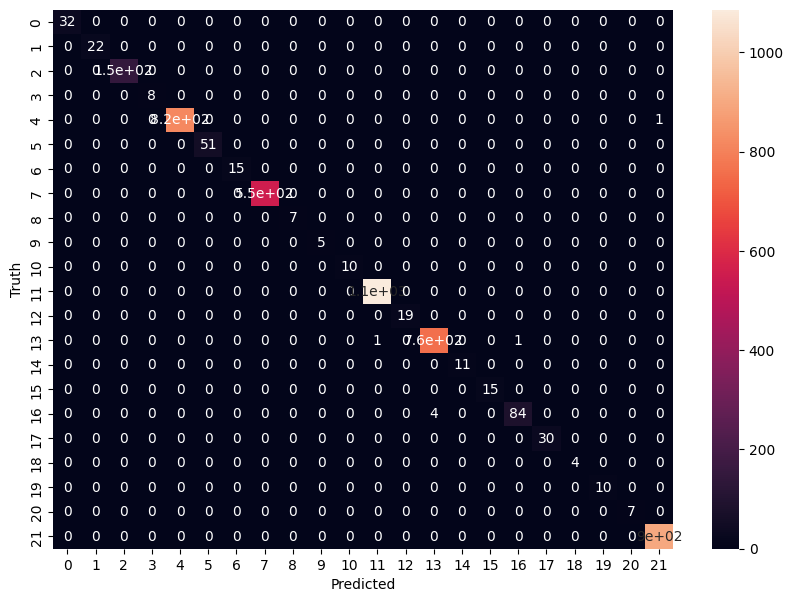

In [17]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')